In [ ]:
import pandas as pd


The link to data https://drive.google.com/file/d/1jly1-Tc2tRziTp2wxJltIY2kB4wJjjXe/view?usp=sharing

I have added around 50 new codeforces and codechef ratings of users, after viewing many linkedin profiles, lol

In [ ]:
df = pd.read_csv('/content/mydata.csv')

In [ ]:
#Extracting only the numerical columns and dropping nan
#dropping the nan values
df1 = df.dropna()
x = df1['cc_rating']
y = df1['cf_rating']



<Axes: xlabel='cc_rating', ylabel='cf_rating'>

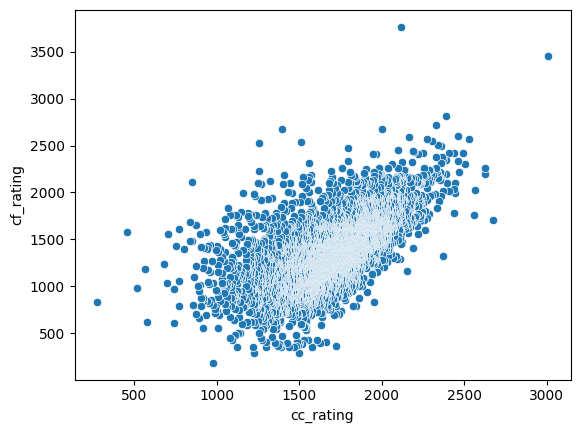

In [ ]:
#performing EDA
import seaborn as sns
sns.scatterplot(x=x,y=y)


Clearly we can see that most of the users with less codeforces rating have more rating on codechef which shows that codechef is a good platform for begginers in coding

In [ ]:
#Assigning ranks to each rating group for codechef and codeforces
df1['rank'] = 'other'
df1.loc[(df1['cc_rating'] <= 1400), 'rank'] = '1-star'
df1.loc[(df1['cc_rating'] > 1400) & (df1['cc_rating'] <= 1600), 'rank'] = '2-star'
df1.loc[(df1['cc_rating'] > 1600) & (df1['cc_rating'] <= 1800), 'rank'] = '3-star'
df1.loc[(df1['cc_rating'] > 1800) & (df1['cc_rating'] <= 2000), 'rank'] = '4-star'
df1.loc[(df1['cc_rating'] > 2000) & (df1['cc_rating'] <= 2200), 'rank'] = '5-star'
df1.loc[(df1['cc_rating'] > 2200) & (df1['cc_rating'] <= 2500), 'rank'] = '6-star'
df1.loc[(df1['cc_rating'] > 2500), 'rank'] = '7-star'

df1['rankcf'] = 'Unrated'

df1.loc[df1['cf_rating'] < 1200, 'rankcf'] = 'Newbie'
df1.loc[(df1['cf_rating'] >= 1200) & (df1['cf_rating'] < 1400), 'rankcf'] = 'Pupil'
df1.loc[(df1['cf_rating'] >= 1400) & (df1['cf_rating'] < 1600), 'rankcf'] = 'Specialist'
df1.loc[(df1['cf_rating'] >= 1600) & (df1['cf_rating'] < 1900), 'rankcf'] = 'Expert'
df1.loc[(df1['cf_rating'] >= 1900) & (df1['cf_rating'] < 2100), 'rankcf'] = 'CM'
df1.loc[(df1['cf_rating'] >= 2100) & (df1['cf_rating'] < 2300), 'rankcf'] = 'Master'
df1.loc[(df1['cf_rating'] >= 2300) & (df1['cf_rating'] < 2400), 'rankcf'] = 'IM'
df1.loc[(df1['cf_rating'] >= 2400) & (df1['cf_rating'] < 2600), 'rankcf'] = 'GM'
df1.loc[(df1['cf_rating'] >= 2600) & (df1['cf_rating'] < 3000), 'rankcf'] = 'IGM'
df1.loc[df1['cf_rating'] >= 3000, 'rankcf'] = 'LGM'



<Axes: xlabel='rank', ylabel='count'>

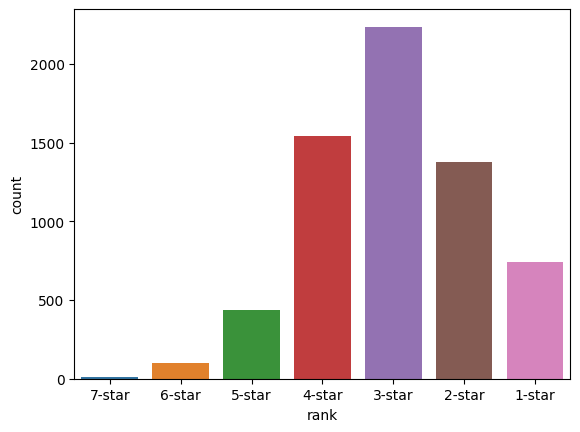

In [ ]:
sns.countplot(x='rank',data=df1,hue = 'rank')

<Axes: xlabel='rankcf', ylabel='count'>

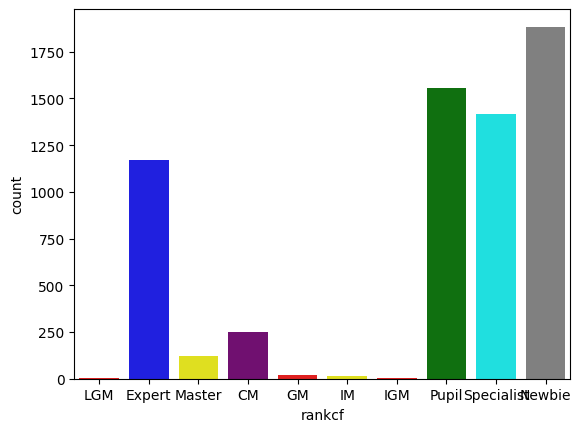

In [ ]:
custom_palette = {
    'LGM': 'red',
    'IGM': 'red',
    'GM': 'red',
    'IM': 'yellow',
    'Master': 'yellow',
    'CM': 'purple',
    'Expert': 'blue',
    'Specialist': 'cyan',
    'Pupil': 'green',
    'Newbie': 'grey',

}
sns.countplot(x='rankcf',data=df1,hue = 'rankcf',palette=custom_palette)

# plt.figure(figsize=(100, 100))

From these both graphs we conclude that most of the users of codechef in this dataset are of 3 star , and from codeforces most of them are Newbie,
Since it also depends on how much time each user has given on the platform we cannot tell that most of the newbies are 3 star on codeforces and the same for other rating groups aswell


Intercept = -32.62926507315615, slope = 0.8315620555789324


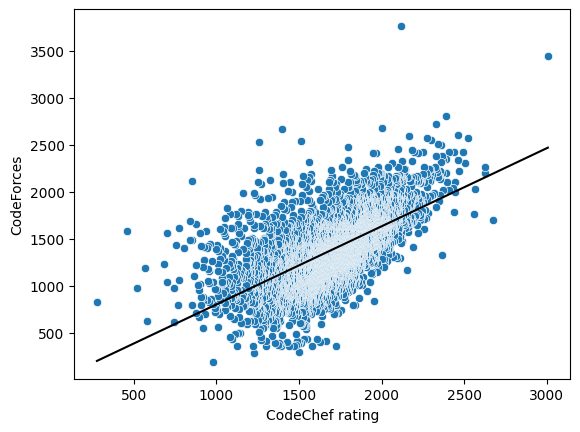

In [ ]:
#Creating a linear regression model
import numpy as np

def estimate_coef(x,y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    cdxy = np.sum(y*x) - n*m_y*m_x
    cdxx = np.sum(x*x) - n*m_x*m_x

    b_1 = cdxy/cdxx
    b_0 = m_y - b_1*m_x
    return(b_0,b_1)

def plotline(x,y,b):
    sns.scatterplot(x=x,y=y)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "k")
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces')
    plt.show()

b = estimate_coef(x,y)
print(f"Intercept = {b[0]}, slope = {b[1]}")

plotline(x,y,b)


Intercept = 1044.6363090556147, slope = 0.4691287713538771


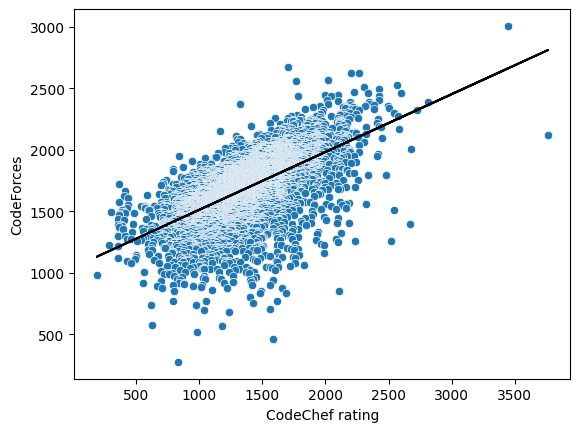

In [ ]:
#codeforces to codechef rating
x1 = df1['cf_rating']
y1 = df1['cc_rating']

def estimate_coef(x,y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    cdxy = np.sum(y*x) - n*m_y*m_x
    cdxx = np.sum(x*x) - n*m_x*m_x

    b_1 = cdxy/cdxx
    b_0 = m_y - b_1*m_x
    return(b_0,b_1)

def plotline(x,y,b):
    sns.scatterplot(x=x,y=y)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "k")
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces')
    plt.show()

b = estimate_coef(x1,y1)
print(f"Intercept = {b[0]}, slope = {b[1]}")

plotline(x1,y1,b)
